In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
dataset=pd.read_csv('mall_customers.csv')
dataset

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]].values

In [4]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=2)
y_means=clustering.fit_predict(x)

In [5]:
y_means

array([137, 136,  42,  43, 135,  43,  42, 134, 133, 132,  19, 131,  19,
        41,  19,  41, 130, 129, 128, 127, 126,  40, 125,  40, 124, 122,
        39, 123,  39, 121, 120, 119, 118, 115, 117, 116, 114, 113, 112,
       111,  38, 110,  38, 108, 109, 107, 105, 106,  37,  37, 104,  36,
       102,  36,  18, 103, 101,  18,   6,  18,  35,  35,   6,  17,   6,
        17,   6,  16,  17,  16,  34, 100,  99,  34,  14,   2,   2,  14,
         2,  33,   2,  13,  33,  15,  13,  14,  98,  32,  96,  97,  32,
         5,   1,   5,   5,  11,   1,   1,   0,   1,   0,   4,  95,  12,
        12,   0,   3,   4,  10,   4,  11,  12,  10,   4,   3,   3,  31,
        94,  31,  30,  30,  93,  92,  91,  90,  89,  27,  88,  29,  28,
        29,  28,  27,  87,   9,  86,   9,  26,  85,  26,   9,  84,  83,
        82,  81,  79,  80,  25,  22,   8,  23,   8,  22,  21,  23,   8,
        24,  21,  24,  25,  78,  77,  76,  75,  74,  20,  73,  72,  70,
        69,   7,  20,  71,  68,   7,  66,   7,  67,  65,  64,  6

In [6]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=y_means
supervised

,customer_id,gender,age,annual_income,spending_score,Cluster_group
0,1,Male,19,15,39,137
1,2,Male,21,15,81,136
2,3,Female,20,16,6,42
3,4,Female,23,16,77,43
4,5,Female,31,17,40,135
...,...,...,...,...,...,...
195,196,Female,35,120,79,48
196,197,Female,45,126,28,47
197,198,Male,32,126,74,46
198,199,Male,32,137,18,45


In [7]:
supervised.to_csv("mean_shift.csv",index=False)
centroids=clustering.cluster_centers_
centroids

array([[ 62.        ,  42.        ],
       [ 60.6       ,  48.6       ],
       [ 54.        ,  53.        ],
       [ 64.        ,  49.        ],
       [ 63.        ,  47.        ],
       [ 60.        ,  41.25      ],
       [ 47.25      ,  51.        ],
       [ 87.66666667,  13.66666667],
       [ 78.        ,  89.        ],
       [ 73.66666667,   5.66666667],
       [ 64.        ,  42.66666667],
       [ 63.        ,  52.        ],
       [ 62.33333333,  55.        ],
       [ 54.        ,  55.33333333],
       [ 54.        ,  47.        ],
       [ 54.        ,  44.        ],
       [ 48.        ,  48.33333333],
       [ 47.66666667,  59.        ],
       [ 44.33333333,  45.66666667],
       [ 19.66666667,  14.        ],
       [ 86.        ,  75.        ],
       [ 78.        ,  77.        ],
       [ 78.        ,  21.        ],
       [ 78.        ,  16.5       ],
       [ 78.        ,   1.        ],
       [ 77.5       ,  73.5       ],
       [ 73.5       ,  72.5       ],
 

C:\Users\Ibrahim\.conda\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


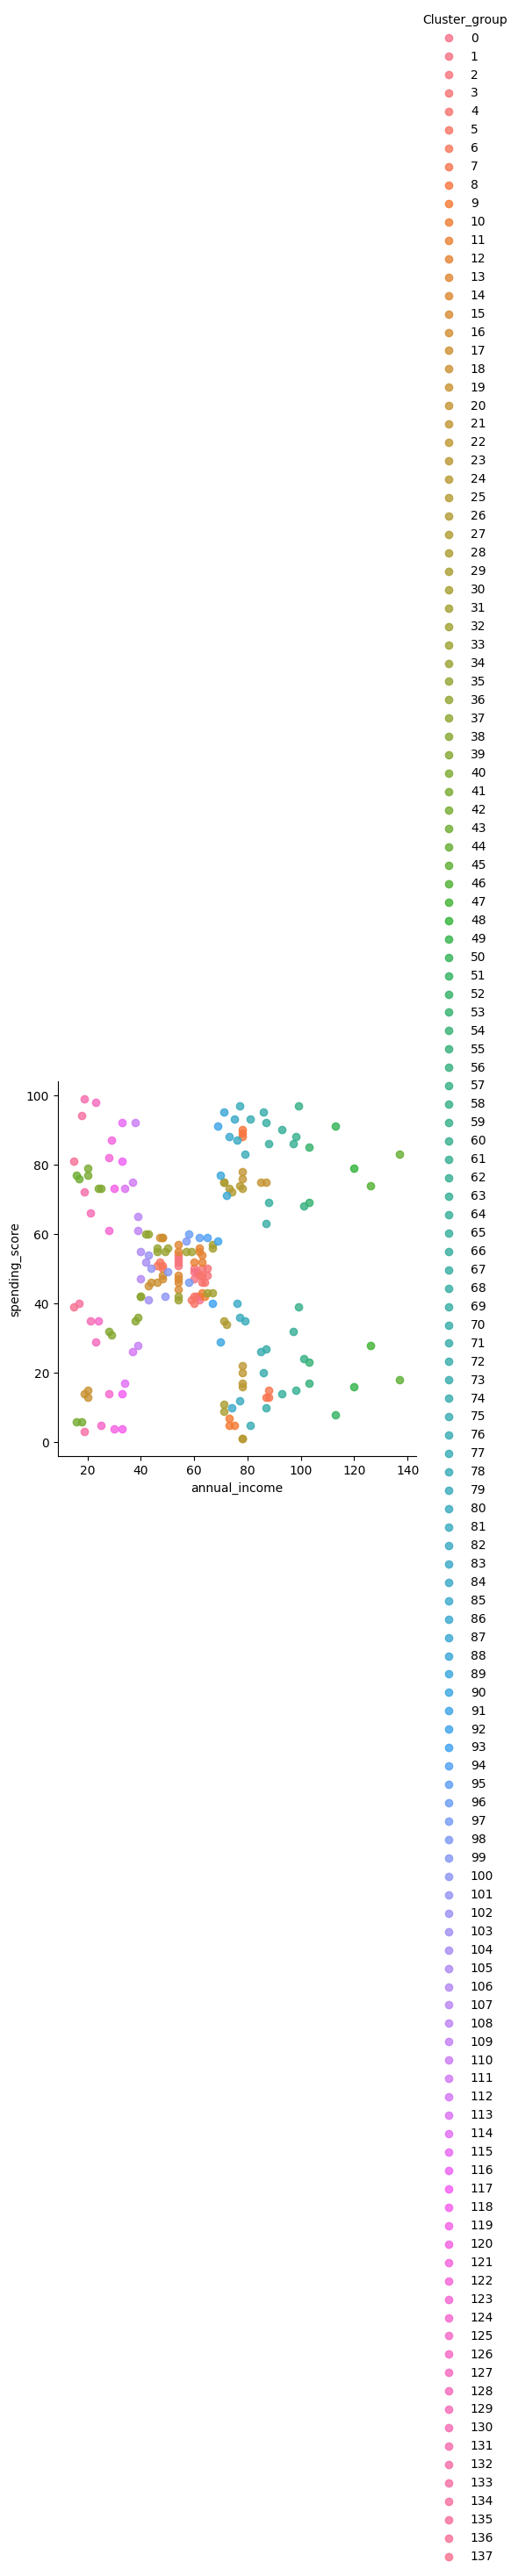

In [8]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)